2025-01-09 12:03:03.667467: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-09 12:03:03.668811: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-09 12:03:03.671853: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-09 12:03:03.680376: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1736424183.694459    6716 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1736424183.69

Final feature columns used in training: ['KiWo', 'Is_Ferien', 'Holiday', 'Is_Weekend', 'Weihnachten_Sommer', 'Christmas_Sales', 'Temperature_Category', 'Windgeschwindigkeit_Beaufort', 'Rain_Status', 'Cloud_Status', 'Warengruppe_1', 'Warengruppe_2', 'Warengruppe_3', 'Warengruppe_4', 'Warengruppe_5', 'Warengruppe_6']
Epoch 1/100


/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-01-09 12:03:05.474153: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


234/234 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 56886.1211 - mae: 188.9690 - val_loss: 4495.3569 - val_mae: 46.7695 - learning_rate: 0.0010
Epoch 2/100
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 10484.8916 - mae: 68.5492 - val_loss: 3885.2051 - val_mae: 42.4824 - learning_rate: 0.0010
Epoch 3/100
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10086.8076 - mae: 65.5436 - val_loss: 3658.6309 - val_mae: 41.0017 - learning_rate: 0.0010
Epoch 4/100
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8831.9473 - mae: 62.2274 - val_loss: 3442.5850 - val_mae: 39.2059 - learning_rate: 0.0010
Epoch 5/100
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8081.5752 - mae: 60.7869 - val_loss: 3377.5813 - val_mae: 38.6149 - learning_rate: 0.0010
Epoch 6/100
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9667.7959 - mae: 61.2868 - val_loss: 3280.8193 - val_mae: 38.0235 - learning_rate: 0.0010
Epoch 7/100
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9504.3027 - mae: 61.5861 - val_loss: 3143

Best R²: 0.8266
Validation cost: 2.6930e+06
Mean Squared Error (MSE) on validation set: 2.9415e+03
Mean Absolute Percentage Error (MAPE): 0.21%

Final Model Parameters:
Feature: KiWo, Weight: 0.0474
Feature: Is_Ferien, Weight: -0.1014
Feature: Holiday, Weight: 0.0461
Feature: Is_Weekend, Weight: 0.2324
Feature: Weihnachten_Sommer, Weight: 0.1543
Feature: Christmas_Sales, Weight: 0.1325
Feature: Temperature_Category, Weight: 0.4238
Feature: Windgeschwindigkeit_Beaufort, Weight: -0.1371
Feature: Rain_Status, Weight: 0.1863
Feature: Cloud_Status, Weight: 0.0303
Feature: Warengruppe_1, Weight: -0.0260
Feature: Warengruppe_2, Weight: 0.4894
Feature: Warengruppe_3, Weight: 0.1227
Feature: Warengruppe_4, Weight: -0.3142
Feature: Warengruppe_5, Weight: -0.3215
Feature: Warengruppe_6, Weight: -0.1386
Intercept (b): -0.2670
Model saved to: /workspaces/Team_Raum-3_BakerySalesPredictions/3_Model/nn_model.h5


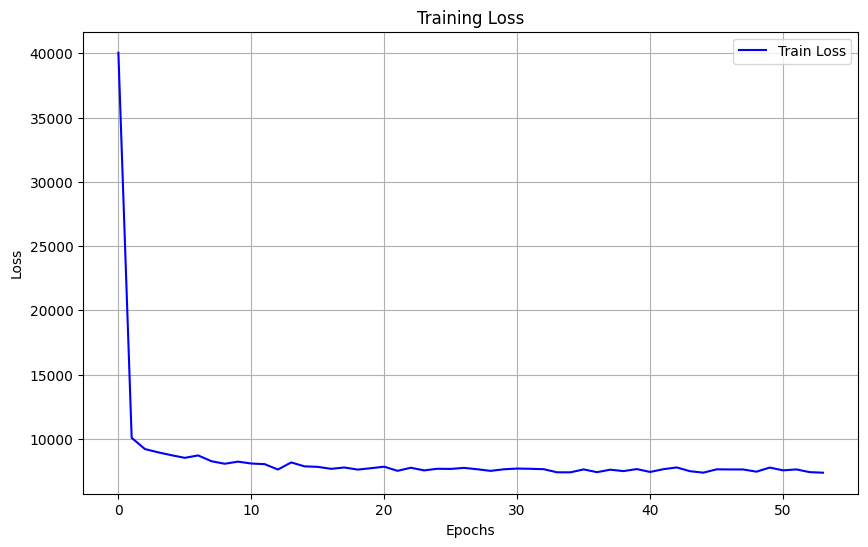

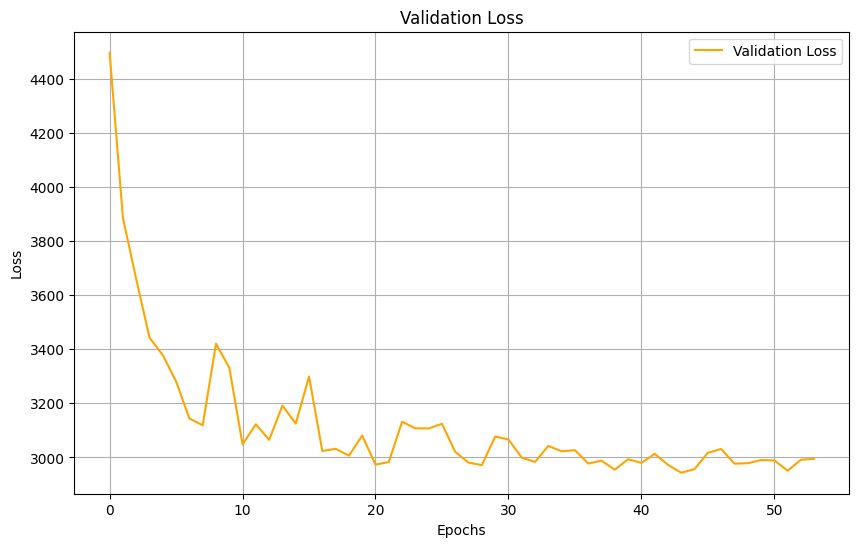


MAPEs by Warengruppe:
Warengruppe_1: 23.91%
Warengruppe_2: 15.45%
Warengruppe_3: 21.06%
Warengruppe_4: 24.03%
Warengruppe_5: 16.78%
Warengruppe_6: 46.04%

Overall Validation MAPE: 46.04%
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2525.4297 - mae: 32.9692  
439/439 ━━━━━━━━━━━━━━━━━━━━ 0s 794us/step
Final submission saved to: /workspaces/Team_Raum-3_BakerySalesPredictions/0_DataPreparation/final_submission.csv


In [1]:
##############################################################################
# Training
##############################################################################

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
import os

# Load and preprocess data
data = pd.read_csv("/workspaces/Team_Raum-3_BakerySalesPredictions/0_DataPreparation/processed_data_imputed.csv")

# Filter out rows with Umsatz = 0
data = data[data['Umsatz'] != 0]

# Ensure 'Datum' is in datetime format
data['Datum'] = pd.to_datetime(data['Datum'], errors='coerce')

# Define feature columns
feature_columns = [
    'KiWo',
    'Is_Ferien',
    'Holiday',
    'Is_Weekend',
    'Weihnachten_Sommer',
    'Christmas_Sales',
    'Temperature_Category',
    'Windgeschwindigkeit_Beaufort',
    'Rain_Status',
    'Cloud_Status',
    'Warengruppe_1',
    'Warengruppe_2',
    'Warengruppe_3',
    'Warengruppe_4',
    'Warengruppe_5',
    'Warengruppe_6'
]

print("Final feature columns used in training:", feature_columns)

# Split data into training and validation sets
training_start_date = '2013-07-01'
training_end_date = '2017-07-31'
validation_start_date = '2017-08-01'
validation_end_date = '2018-07-31'

train_data = data[(data['Datum'] >= training_start_date) & (data['Datum'] <= training_end_date)]
val_data = data[(data['Datum'] >= validation_start_date) & (data['Datum'] <= validation_end_date)]

X_train = train_data[feature_columns].to_numpy()
y_train = train_data['Umsatz'].to_numpy()
X_val = val_data[feature_columns].to_numpy()
y_val = val_data['Umsatz'].to_numpy()

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Build the neural network model
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l2(0.01)),  # Input layer with L2 regularization
    Dropout(0.3),  # Dropout layer
    Dense(32, activation='relu', kernel_regularizer=l2(0.01)),  # Hidden layer with L2 regularization
    Dropout(0.3),  # Dropout layer
    Dense(16, activation='relu', kernel_regularizer=l2(0.01)),  # Hidden layer with L2 regularization
    Dropout(0.3),  # Dropout layer
    Dense(1, activation='linear')  # Output layer for regression
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# Callbacks for early stopping and learning rate adjustment
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)
lr_adjustment = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping, lr_adjustment],
    verbose=1
)

# Evaluate the model
y_val_pred = model.predict(X_val).flatten()
mse = mean_squared_error(y_val, y_val_pred)
mape = mean_absolute_percentage_error(y_val, y_val_pred)
r2 = r2_score(y_val, y_val_pred)
validation_cost = mse * len(y_val) / 2

print(f"Best R²: {r2:.4f}")
print(f"Validation cost: {validation_cost:.4e}")
print(f"Mean Squared Error (MSE) on validation set: {mse:.4e}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# Extract and display model parameters (weights from the first layer)
weights, biases = model.layers[0].get_weights()

print("\nFinal Model Parameters:")
for i, feature in enumerate(feature_columns):
    print(f"Feature: {feature}, Weight: {weights[i][0]:.4f}")
print(f"Intercept (b): {biases[0]:.4f}")

# Save the trained model
model_save_path = "/workspaces/Team_Raum-3_BakerySalesPredictions/3_Model/nn_model.h5"
os.makedirs(os.path.dirname(model_save_path), exist_ok=True)
model.save(model_save_path)
print(f"Model saved to: {model_save_path}")

# Plot training loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss', color='blue')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Calculate MAPE for each "Warengruppe"
warengruppen_columns = ['Warengruppe_1', 'Warengruppe_2', 'Warengruppe_3', 'Warengruppe_4', 'Warengruppe_5', 'Warengruppe_6']
mape_by_warengruppe = {}

for col in warengruppen_columns:
    # Filter validation data where the Warengruppe column is 1 (active)
    mask = val_data[col] == 1
    if mask.sum() > 0:  # Ensure there are valid data points
        mape_by_warengruppe[col] = mean_absolute_percentage_error(
            y_val[mask], y_val_pred[mask]) * 100
    else:
        mape_by_warengruppe[col] = None  # No data points for this Warengruppe

# Print MAPEs
print("\nMAPEs by Warengruppe:")
for group, mape in mape_by_warengruppe.items():
    if mape is not None:
        print(f"{group}: {mape:.2f}%")
    else:
        print(f"{group}: No data points in validation set.")

# Overall MAPE is already computed earlier
print(f"\nOverall Validation MAPE: {mape:.2f}%")

##############################################################################
# Simulation
##############################################################################

from tensorflow.keras.models import load_model
from tensorflow.keras.losses import MeanSquaredError

# Paths to the files
processed_data_path = "/workspaces/Team_Raum-3_BakerySalesPredictions/0_DataPreparation/processed_data_imputed.csv"
sample_submission_path = "/workspaces/Team_Raum-3_BakerySalesPredictions/0_DataPreparation/sample_submission.csv"
final_submission_path = "/workspaces/Team_Raum-3_BakerySalesPredictions/0_DataPreparation/final_submission.csv"
model_path = "/workspaces/Team_Raum-3_BakerySalesPredictions/3_Model/nn_model.h5"

# Load the processed data and sample submission
processed_data = pd.read_csv(processed_data_path)
sample_submission = pd.read_csv(sample_submission_path)

# Dynamically rebuild feature columns
feature_columns = [
    'KiWo',
    'Is_Ferien',
    'Holiday',
    'Is_Weekend',
    'Weihnachten_Sommer',
    'Christmas_Sales',
    'Temperature_Category',
    'Windgeschwindigkeit_Beaufort',
    'Rain_Status',
    'Cloud_Status',
    'Warengruppe_1',
    'Warengruppe_2',
    'Warengruppe_3',
    'Warengruppe_4',
    'Warengruppe_5',
    'Warengruppe_6'
]

# Extract features for prediction
X_new = processed_data[feature_columns].apply(pd.to_numeric, errors='coerce').fillna(0).to_numpy(dtype=np.float64)

# Load the trained neural network model
model = load_model(
    model_path,
    custom_objects={'mse': MeanSquaredError()}  # Ensure compatibility with saved model
)

# Compile the loaded model to ensure metrics are initialized
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# Perform a dummy evaluation to ensure metrics are initialized
if X_val.shape[0] > 0:  # Ensure there's validation data
    _ = model.evaluate(X_val, y_val, verbose=1)

# Normalize features using the same scaler used during training
X_new = scaler.transform(X_new)  # Use the saved scaler if available

# Predict the output using the trained neural network
y_pred = model.predict(X_new).flatten()

# Add predictions to the processed data DataFrame
processed_data['Predicted_Umsatz'] = y_pred

# Merge predictions with sample submission to ensure matching structure
final_submission = sample_submission[['id']].copy()
final_submission = final_submission.merge(
    processed_data[['id', 'Predicted_Umsatz']],
    how='left',
    left_on='id',
    right_on='id'
)

# Rename 'Predicted_Umsatz' to 'Umsatz'
final_submission.rename(columns={'Predicted_Umsatz': 'Umsatz'}, inplace=True)

# Replace null values in the Umsatz column with 0
final_submission['Umsatz'] = final_submission['Umsatz'].fillna(0)

# Save the final submission file
os.makedirs(os.path.dirname(final_submission_path), exist_ok=True)
final_submission.to_csv(final_submission_path, index=False)

print(f"Final submission saved to: {final_submission_path}")

